## Capstone Project - Columbia DSI - DiDi - Spring 2021
#### Authors:  Danyang Han,  Anita Pinto,  Elizabeth Yum
This file is used to visualize trends in yellow taxi pick-ups and drop-offs by zone, by time interval, and by day of week

In [9]:
import pandas as pd 
import datetime as dt 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from sqlalchemy import create_engine

In [2]:
df = pd.read_csv('../data/trip_cleaned.csv') 
print(df.head(5))

    medallion  hack_license vendor_id  rate_code      pickup_datetime  \
0  2013000001    2013000001       VTS          1  2013-06-24 18:55:00   
1  2013000001    2013000001       VTS          1  2013-06-24 19:12:00   
2  2013000001    2013000001       VTS          1  2013-06-24 19:45:00   
3  2013000001    2013000001       VTS          1  2013-06-24 20:17:00   
4  2013000001    2013000001       VTS          1  2013-06-24 20:30:00   

      dropoff_datetime  passenger_count  trip_distance  pickup_longitude  \
0  2013-06-24 19:01:00                1           0.97        -73.992531   
1  2013-06-24 19:30:00                1           3.04        -73.982498   
2  2013-06-24 20:10:00                2           4.17        -73.981850   
3  2013-06-24 20:28:00                1           2.35        -73.988129   
4  2013-06-24 20:35:00                1           1.24        -73.961098   

   pickup_latitude  ...  trip_time     delta  last_dropoff  first_pickup  \
0        40.724052  ...     

In [16]:
df['pickup_time_act'] = pd.to_datetime(df['pickup_datetime']).dt.time
df['dropoff_time_act'] = pd.to_datetime(df['dropoff_datetime']).dt.time
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
df['pickup_date'] = pd.to_datetime(df['pickup_datetime']).dt.date
df['dropoff_date'] = pd.to_datetime(df['dropoff_datetime']).dt.date
df['pickup_date'] = pd.to_datetime(df['pickup_date'])
df['dropoff_date'] = pd.to_datetime(df['dropoff_date'])

df['day_of_week'] = pd.to_datetime(df['pickup_date']).dt.dayofweek

In [17]:
df.head(10)

medallion  hack_license vendor_id  rate_code     pickup_datetime  \
0  2013000001    2013000001       VTS          1 2013-06-24 18:55:00   
1  2013000001    2013000001       VTS          1 2013-06-24 19:12:00   
2  2013000001    2013000001       VTS          1 2013-06-24 19:45:00   
3  2013000001    2013000001       VTS          1 2013-06-24 20:17:00   
4  2013000001    2013000001       VTS          1 2013-06-24 20:30:00   
5  2013000001    2013000001       VTS          1 2013-06-24 20:37:00   
6  2013000001    2013000001       VTS          1 2013-06-24 20:52:00   
7  2013000001    2013000001       VTS          1 2013-06-24 22:07:00   
8  2013000001    2013000001       VTS          1 2013-06-26 17:24:00   
9  2013000001    2013000001       VTS          1 2013-06-26 17:36:00   

     dropoff_datetime  passenger_count  trip_distance  pickup_longitude  \
0 2013-06-24 19:01:00                1           0.97        -73.992531   
1 2013-06-24 19:30:00                1           3.04        -73.982498   
2 2013-06-24 20:10:00                2           4.17        -73.981850   
3 2013-06-24 20:28:00                1           2.35        -73.988129   
4 2013-06-24 20:35:00                1           1.24        -73.961098   
5 2013-06-24 20:49:00                2           2.60        -73.955383   
6 2013-06-24 21:03:00                1           2.36        -73.979774   
7 2013-06-24 22:13:00                2           0.82        -73.929214   
8 2013-06-26 17:35:00                1           0.86        -73.971581   
9 2013-06-26 17:49:00                2           1.23        -73.972939   

   pickup_latitude  ...  pickup_time  dropoff_day  pickup_day  pickup_weekday  \
0        40.724052  ...     19:00:00   2013-06-24  2013-06-24               1   
1        40.745617  ...     19:15:00   2013-06-24  2013-06-24               1   
2        40.768753  ...     19:45:00   2013-06-24  2013-06-24               1   
3        40.738098  ...     20:15:00   2013-06-24  2013-06-24               1   
4        40.760826  ...     20:30:00   2013-06-24  2013-06-24               1   
5        40.776684  ...     20:30:00   2013-06-24  2013-06-24               1   
6        40.781242  ...     20:45:00   2013-06-24  2013-06-24               1   
7        40.753971  ...     22:00:00   2013-06-24  2013-06-24               1   
8        40.757946  ...     17:30:00   2013-06-26  2013-06-26               1   
9        40.748775  ...     17:30:00   2013-06-26  2013-06-26               1   

  dropoff_weekday pickup_time_act dropoff_time_act  pickup_date  dropoff_date  \
0               1        18:55:00         19:01:00   2013-06-24    2013-06-24   
1               1        19:12:00         19:30:00   2013-06-24    2013-06-24   
2               1        19:45:00         20:10:00   2013-06-24    2013-06-24   
3               1        20:17:00         20:28:00   2013-06-24    2013-06-24   
4               1        20:30:00         20:35:00   2013-06-24    2013-06-24   
5               1        20:37:00         20:49:00   2013-06-24    2013-06-24   
6               1        20:52:00         21:03:00   2013-06-24    2013-06-24   
7               1        22:07:00         22:13:00   2013-06-24    2013-06-24   
8               1        17:24:00         17:35:00   2013-06-26    2013-06-26   
9               1        17:36:00         17:49:00   2013-06-26    2013-06-26   

   day_of_week  
0            0  
1            0  
2            0  
3            0  
4            0  
5            0  
6            0  
7            0  
8            2  
9            2  

[10 rows x 38 columns]

In [18]:
#delect all rows where exact pick_up_time is not recorded 
df = df.drop(df[df['pickup_datetime'].dt.time == dt.time(0,0)].index)
df.shape

(13879785, 38)

In [19]:
df.columns

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'trip_distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'pickup_taxizone_id',
       'dropoff_taxizone_id', 'pickup_datetime_next', 'dropoff_datetime_next',
       'payment_type', 'fare_amount', 'surcharge', 'mta_tax', 'tip_amount',
       'tolls_amount', 'total_amount', 'trip_time', 'delta', 'last_dropoff',
       'first_pickup', 'dropoff_time', 'pickup_time', 'dropoff_day',
       'pickup_day', 'pickup_weekday', 'dropoff_weekday', 'pickup_time_act',
       'dropoff_time_act', 'pickup_date', 'dropoff_date', 'day_of_week'],
      dtype='object')

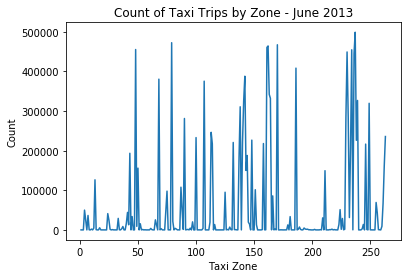

In [93]:
# Number of Pick-ups by Taxi Zone ID
plot1 = df.groupby(['pickup_taxizone_id'])['pickup_date'].size()

# Plotting
plt.plot(plot1)

plt.xlabel("Taxi Zone")
plt.ylabel("Count")

# set chart title
plt.title("Count of Taxi Trips by Zone - June 2013")


plt.show()

In [213]:
print("Number of taxi zones with < 100 trips: " + str(plot1[plot1 < 100].count()))
print("Number of taxi zones with < 1000 trips: " + str(plot1[plot1 < 1000].count()))
print("Number of taxi zones with < 10000 trips: " + str(plot1[plot1 < 10000].count()))
print("Number of taxi zones with < 100000 trips: " + str(plot1[plot1 < 100000].count()))

Number of taxi zones with < 100 trips: 99
Number of taxi zones with < 1000 trips: 149
Number of taxi zones with < 10000 trips: 182
Number of taxi zones with < 100000 trips: 217


In [180]:
# Number of day of week for Month of June
daycount = df.groupby(['day_of_week'], as_index=False).agg({'pickup_date': 'nunique'})

In [194]:
# Reformatting dataset
pu_dayofweek = df.groupby(['pickup_taxizone_id','day_of_week'], as_index=False).agg(
    {'medallion': 'count'}
)

In [196]:
pu_dayofweek2 = pd.merge(daycount, pu_dayofweek, on="day_of_week")
pu_dayofweek2['avg_pu_dayofweek'] = pu_dayofweek2['medallion']/pu_dayofweek2['pickup_date']
pu_dayofweek2

day_of_week  pickup_date  pickup_taxizone_id  medallion  \
0               0            4                 1.0          6   
1               0            4                 2.0          3   
2               0            4                 3.0          4   
3               0            4                 4.0       4159   
4               0            4                 6.0          3   
5               0            4                 7.0       3782   
6               0            4                 8.0         39   
7               0            4                 9.0          2   
8               0            4                10.0        352   
9               0            4                11.0         11   
10              0            4                12.0        531   
11              0            4                13.0      17019   
12              0            4                14.0         50   
13              0            4                15.0          4   
14              0            4                16.0          4   
15              0            4                17.0        402   
16              0            4                18.0         11   
17              0            4                19.0         12   
18              0            4                20.0          5   
19              0            4                21.0         10   
20              0            4                22.0         18   
21              0            4                23.0         16   
22              0            4                24.0       4841   
23              0            4                25.0       2296   
24              0            4                26.0        138   
25              0            4                28.0        100   
26              0            4                29.0         20   
27              0            4                32.0          6   
28              0            4                33.0       3045   
29              0            4                34.0         27   
...           ...          ...                 ...        ...   
1668            6            5               234.0      59514   
1669            6            5               235.0         36   
1670            6            5               236.0      46143   
1671            6            5               237.0      48192   
1672            6            5               238.0      33626   
1673            6            5               239.0      48529   
1674            6            5               240.0          5   
1675            6            5               241.0         21   
1676            6            5               242.0         13   
1677            6            5               243.0        678   
1678            6            5               244.0       2169   
1679            6            5               245.0          2   
1680            6            5               246.0      33667   
1681            6            5               247.0        221   
1682            6            5               248.0         12   
1683            6            5               249.0      56951   
1684            6            5               250.0         38   
1685            6            5               251.0          2   
1686            6            5               252.0          9   
1687            6            5               253.0          6   
1688            6            5               254.0          7   
1689            6            5               255.0      17630   
1690            6            5               256.0      11186   
1691            6            5               257.0        148   
1692            6            5               258.0         46   
1693            6            5               259.0         11   
1694            6            5               260.0       1803   
1695            6            5               261.0      10935   
1696            6            5               262.0      20865   
1697            6            5           

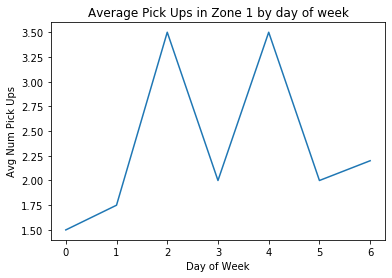

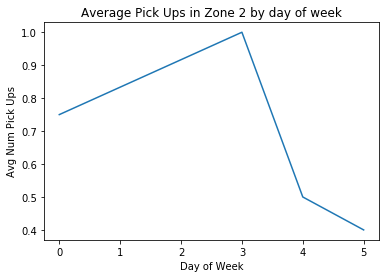

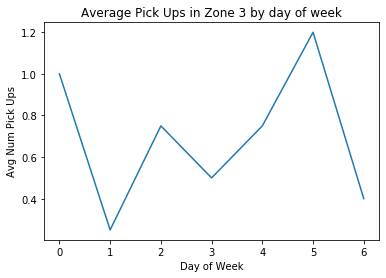

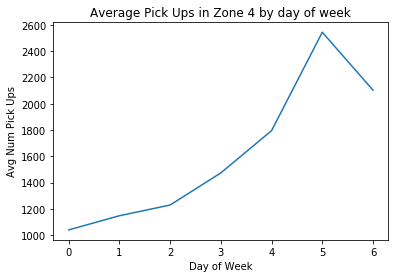

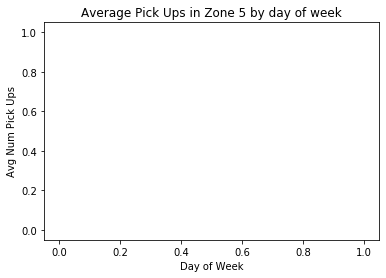

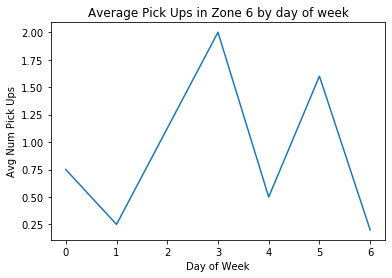

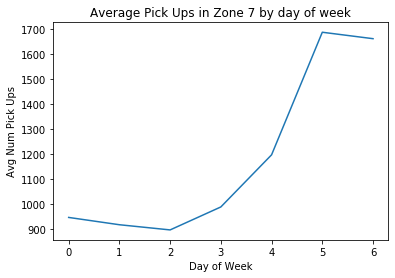

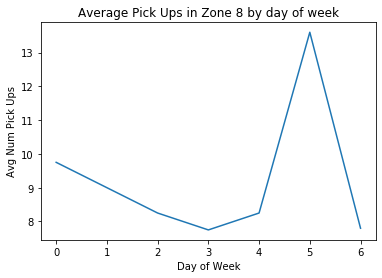

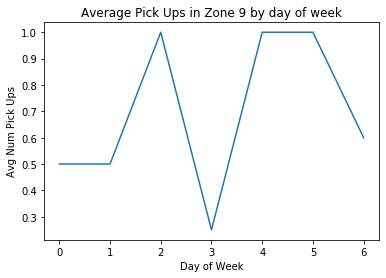

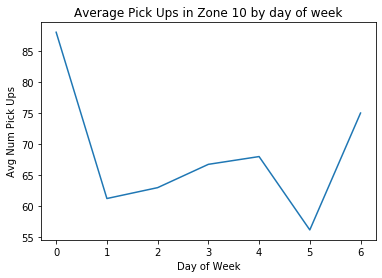

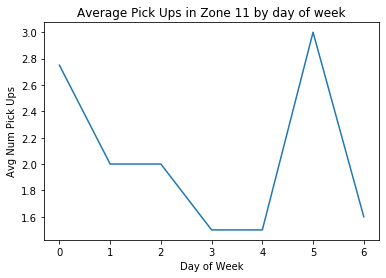

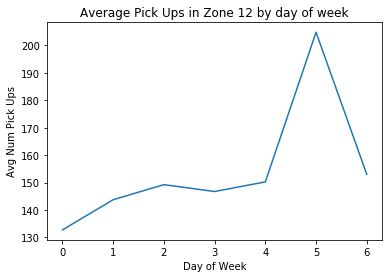

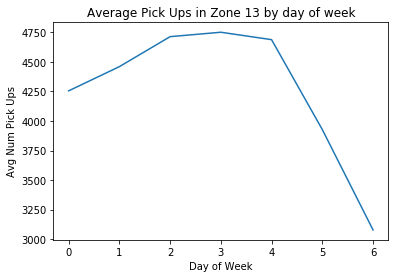

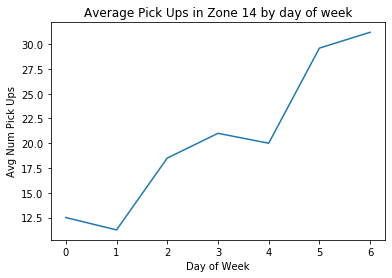

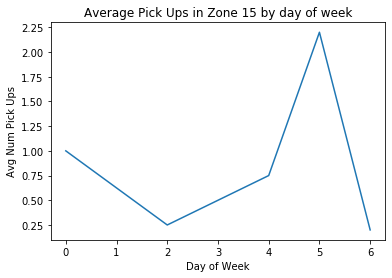

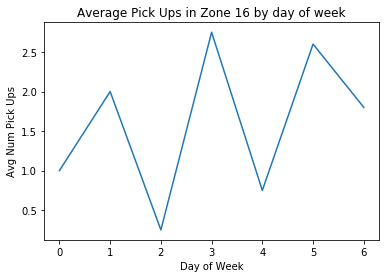

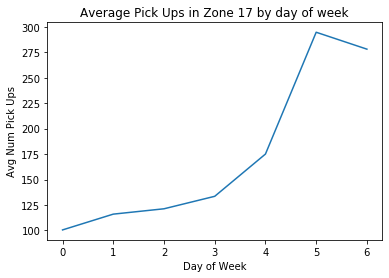

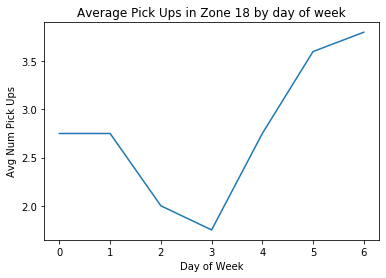

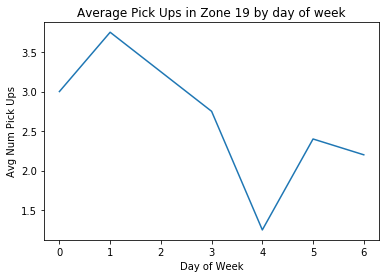

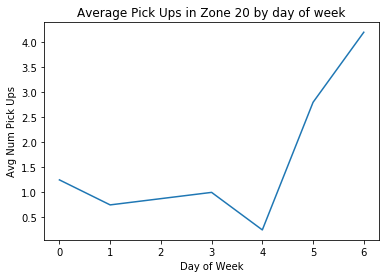

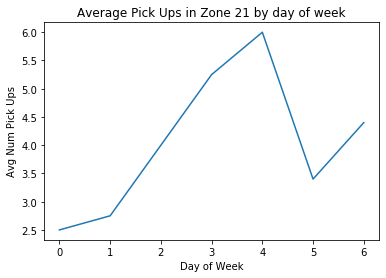

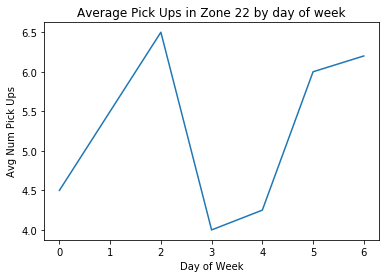

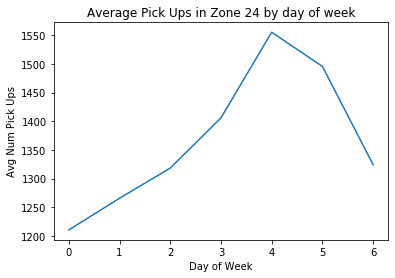

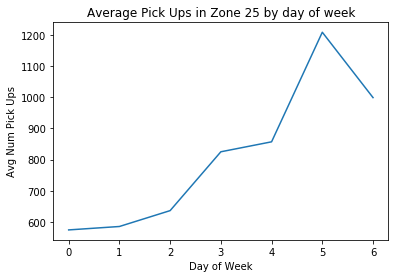

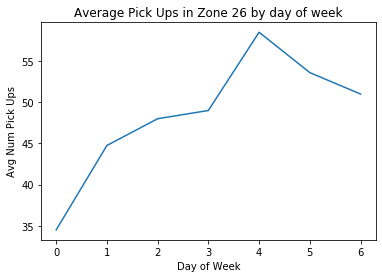

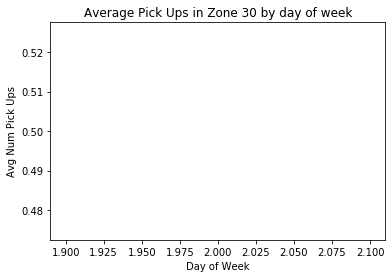

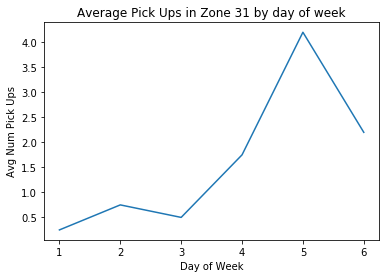

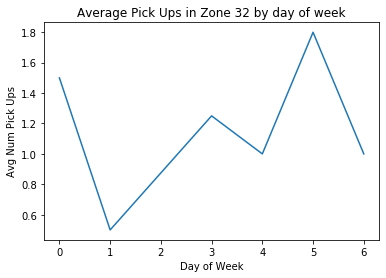

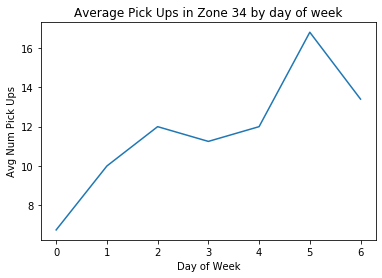

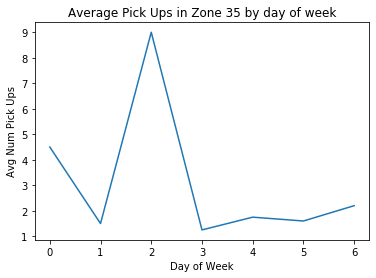

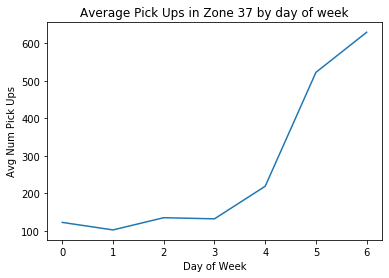

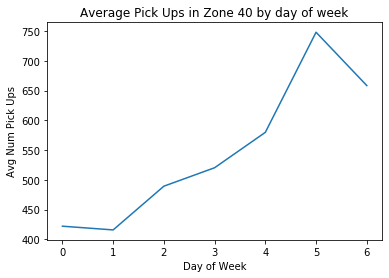

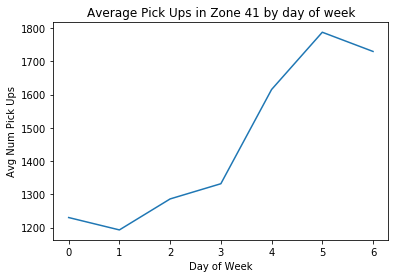

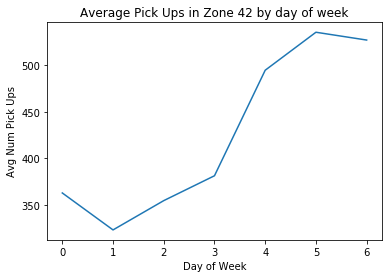

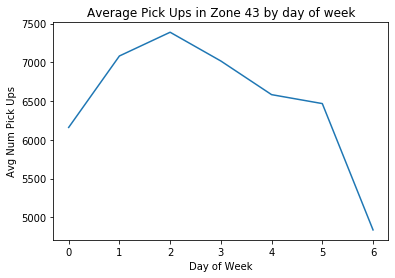

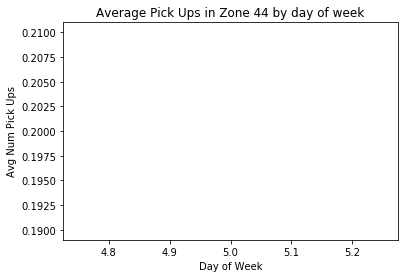

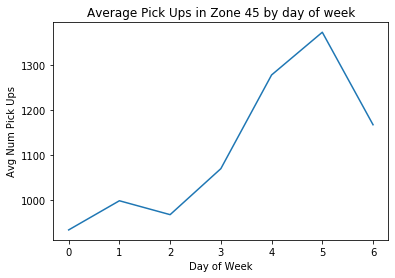

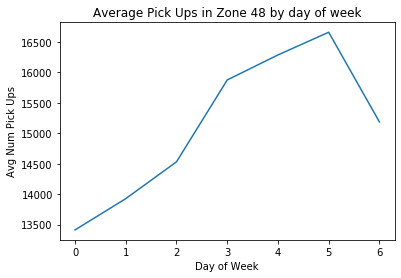

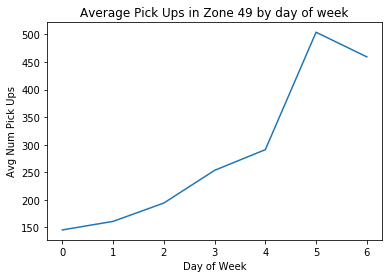

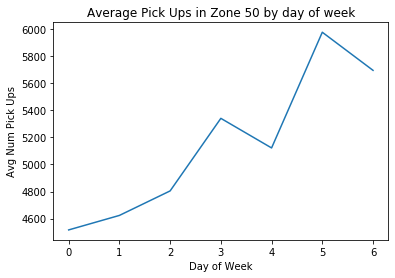

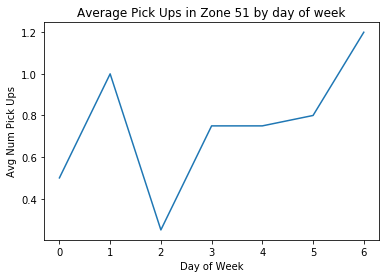

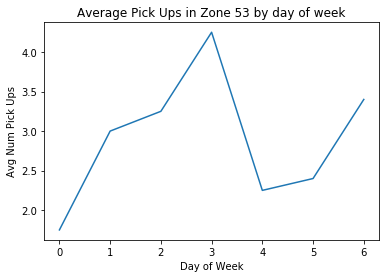

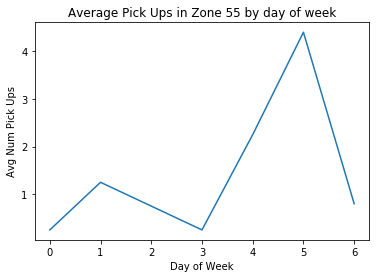

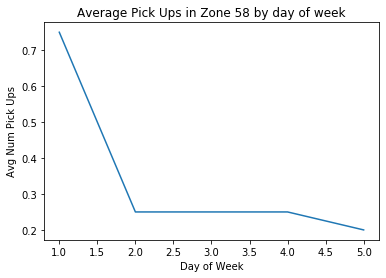

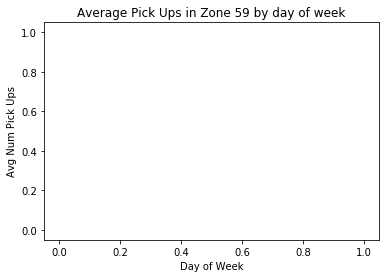

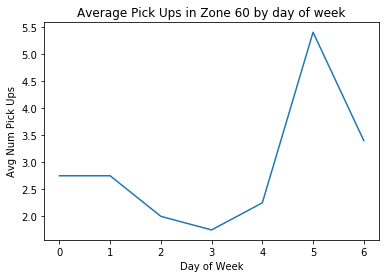

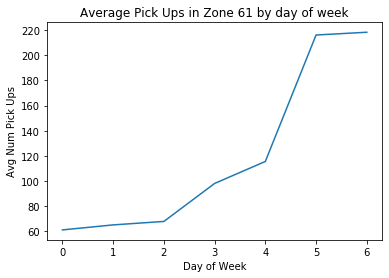

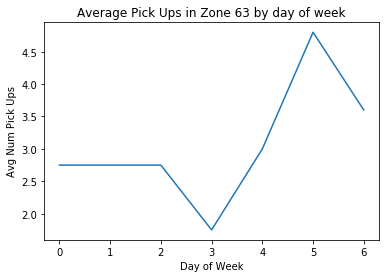

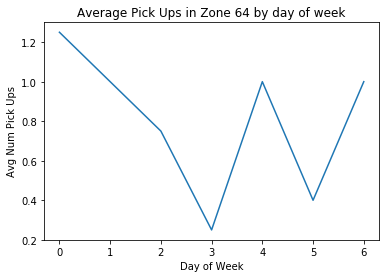

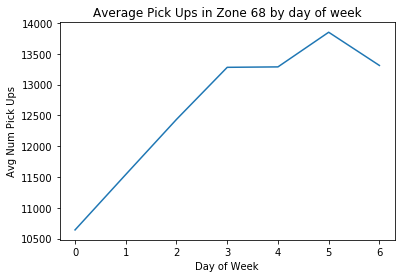

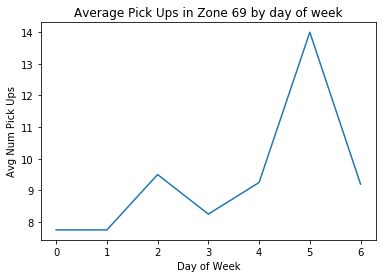

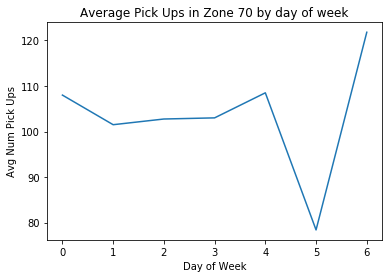

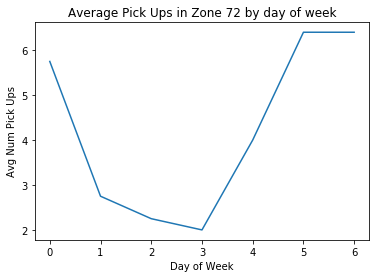

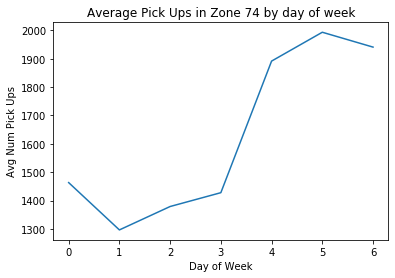

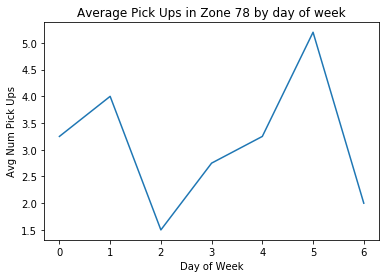

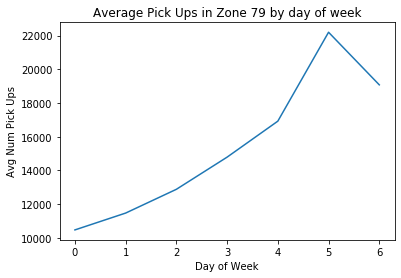

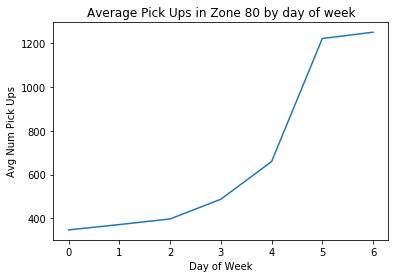

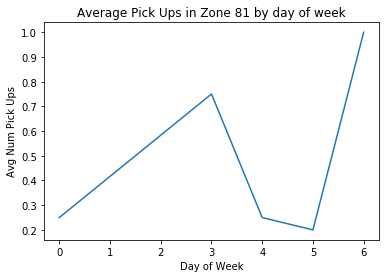

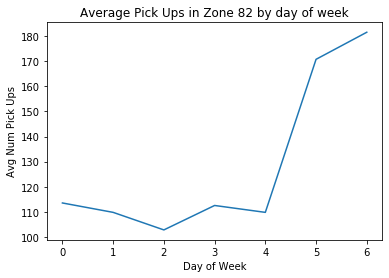

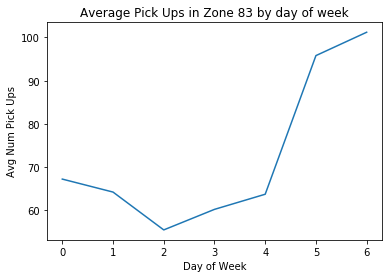

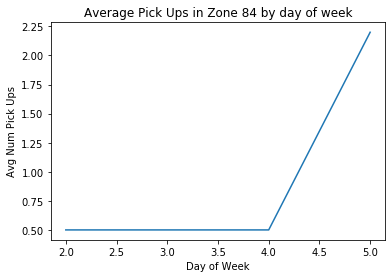

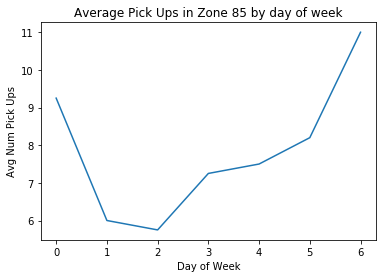

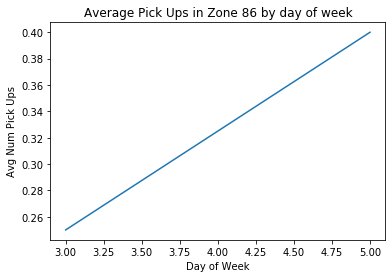

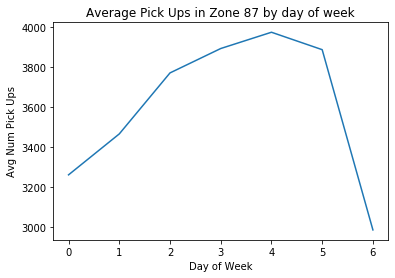

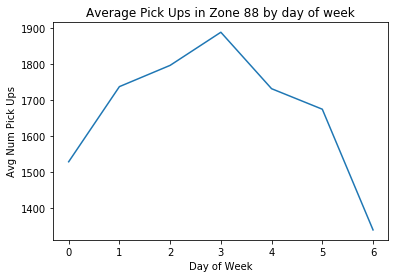

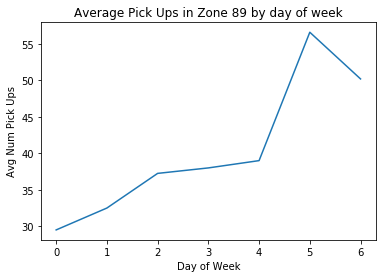

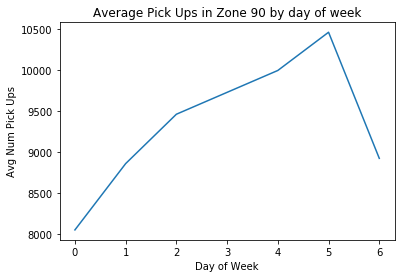

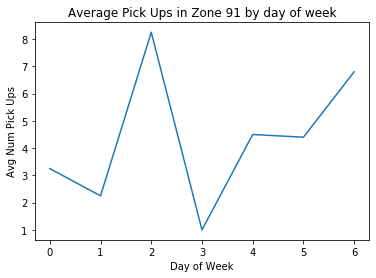

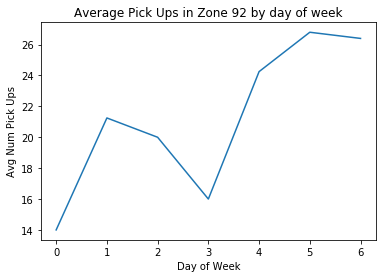

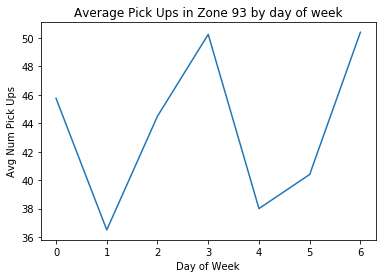

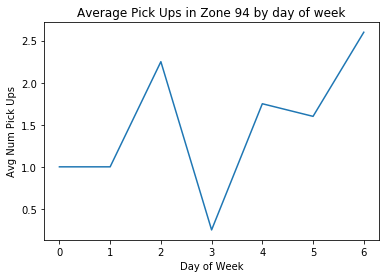

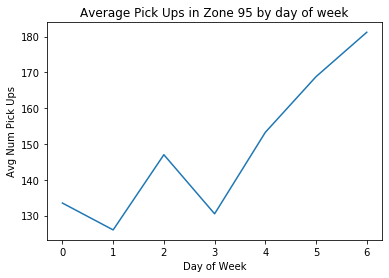

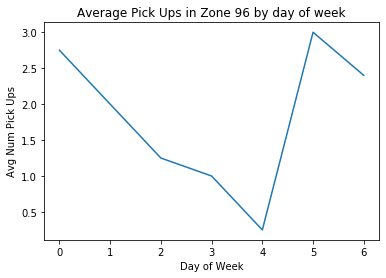

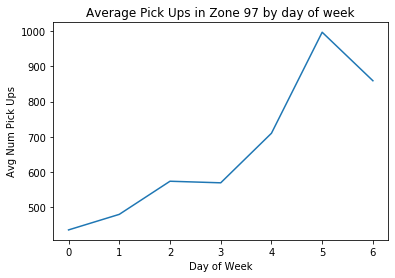

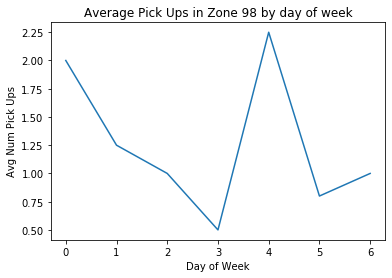

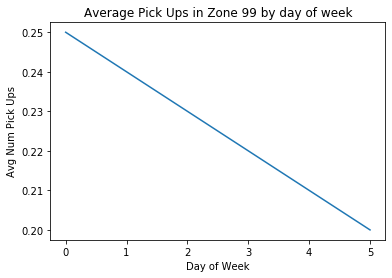

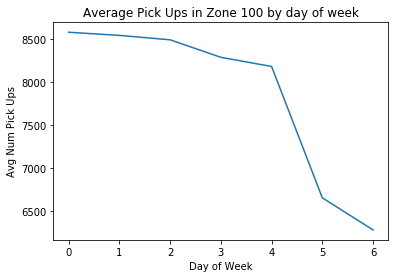

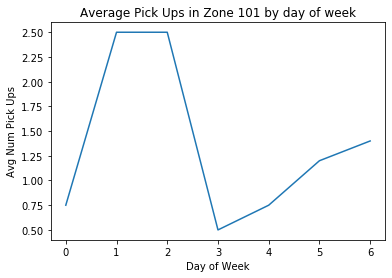

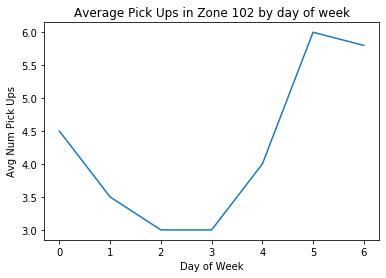

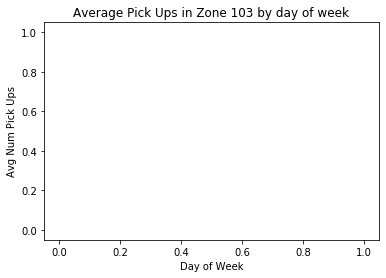

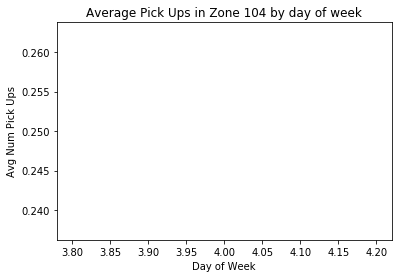

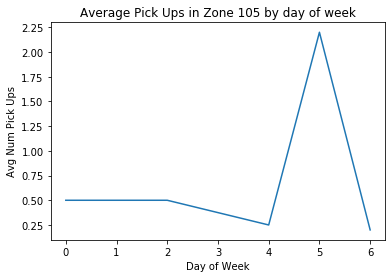

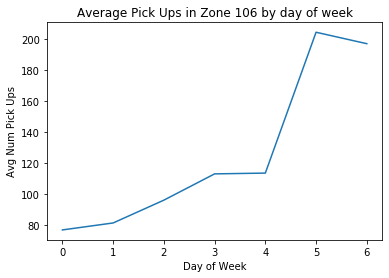

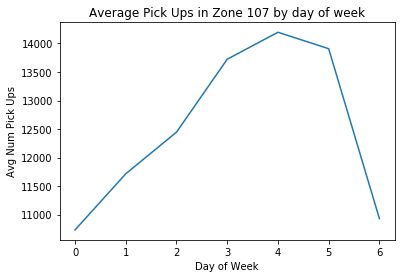

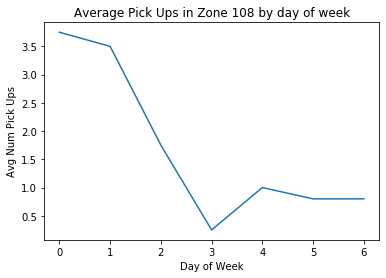

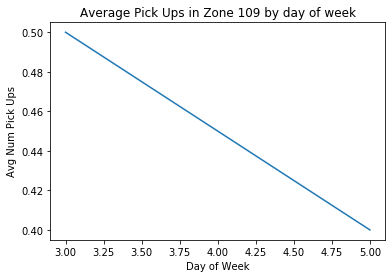

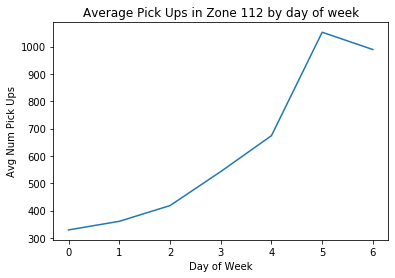

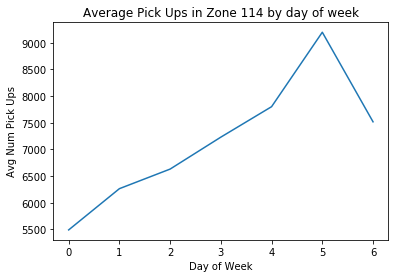

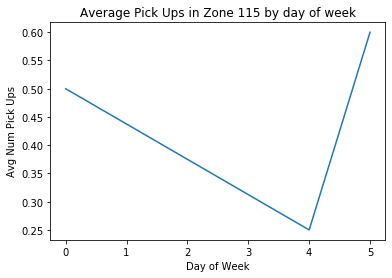

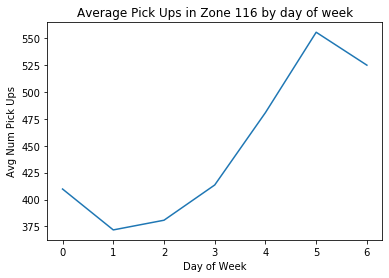

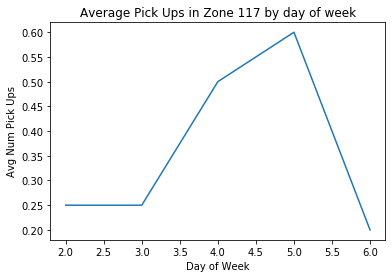

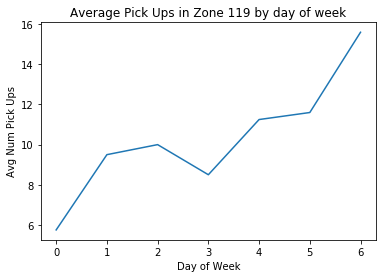

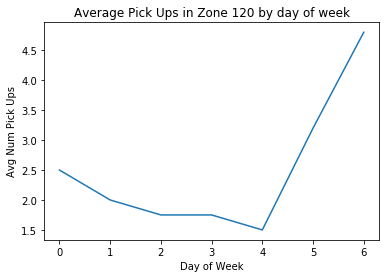

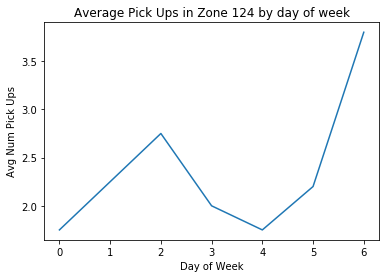

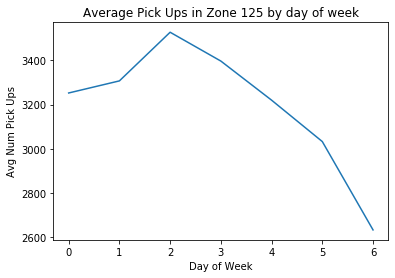

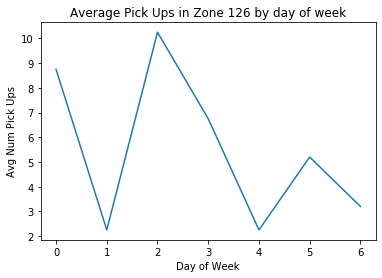

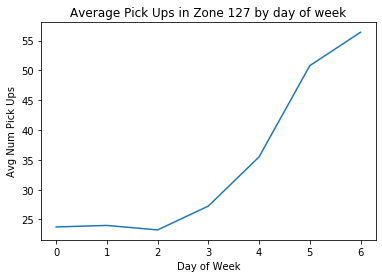

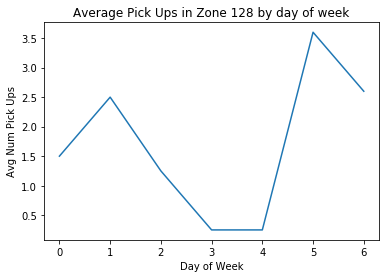

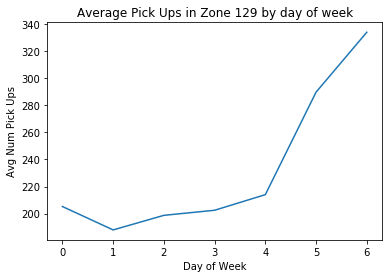

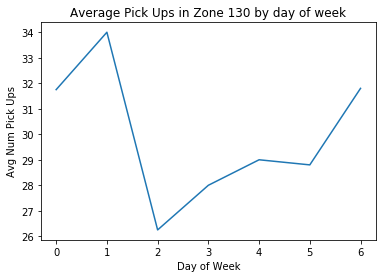

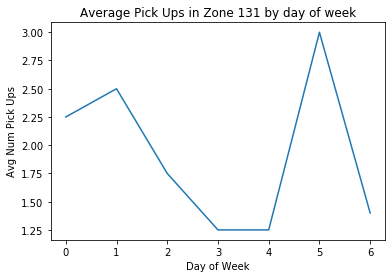

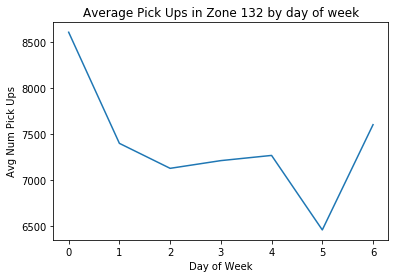

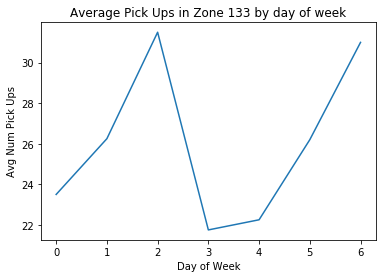

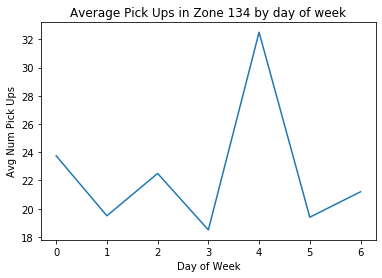

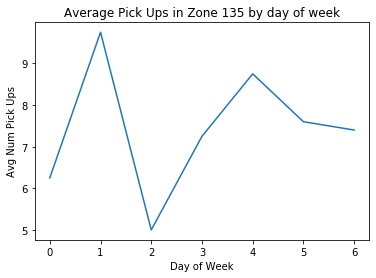

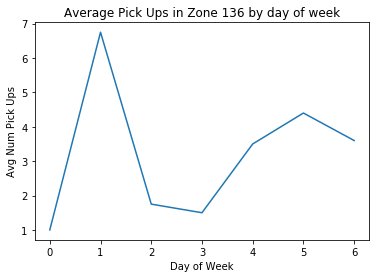

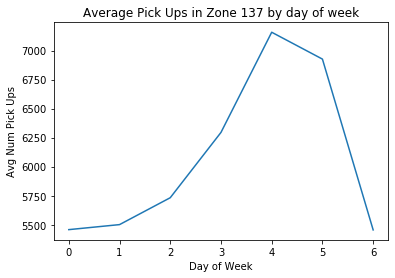

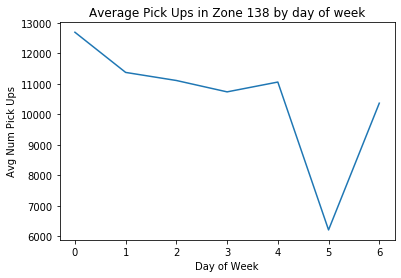

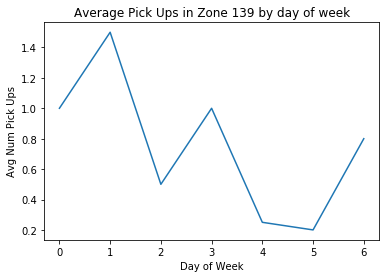

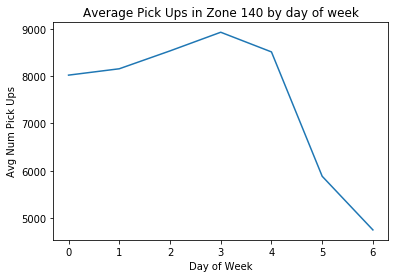

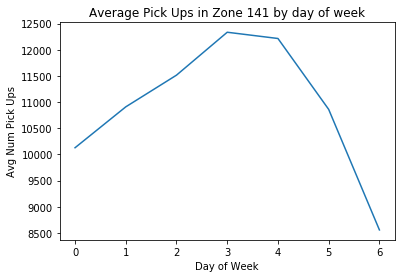

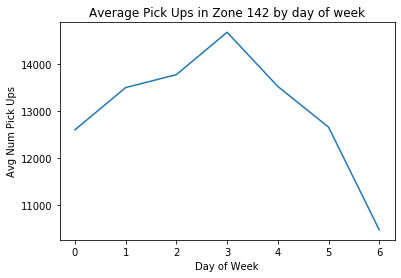

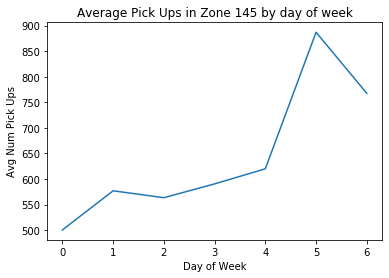

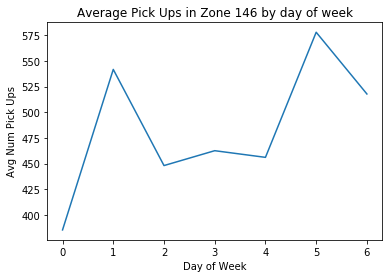

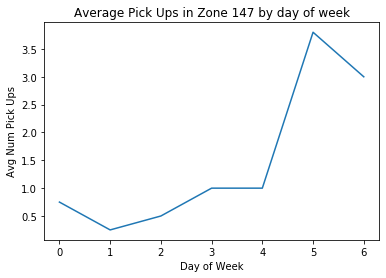

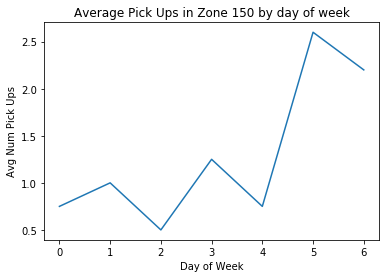

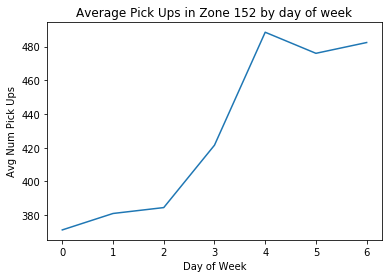

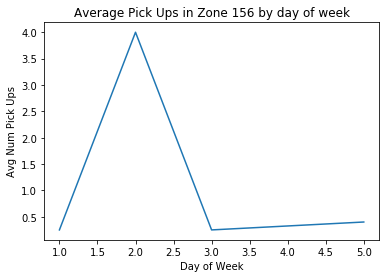

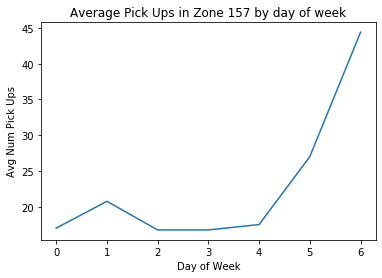

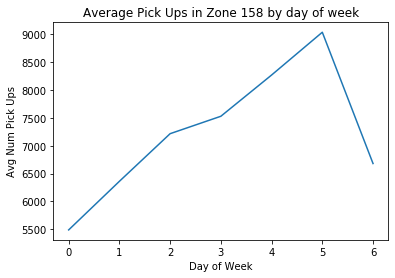

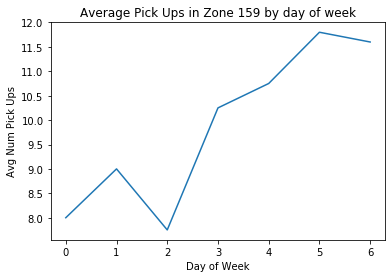

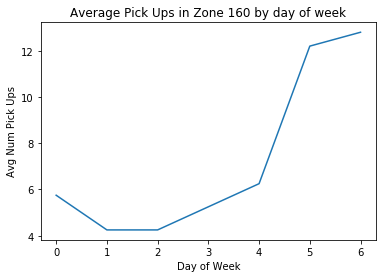

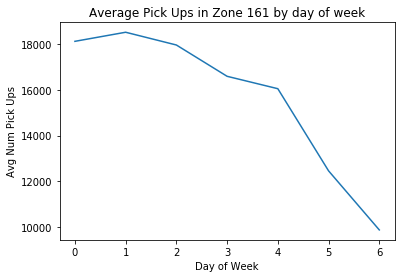

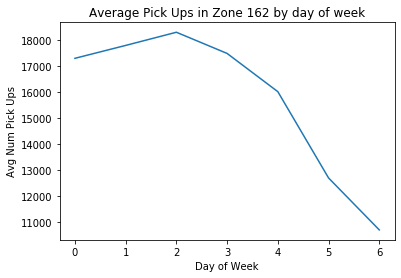

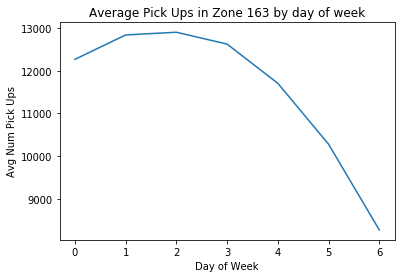

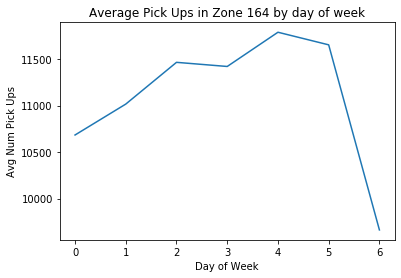

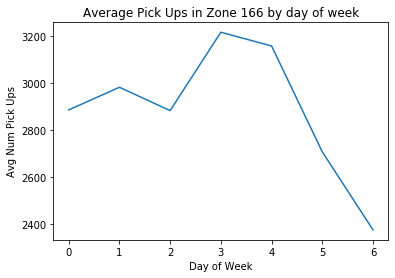

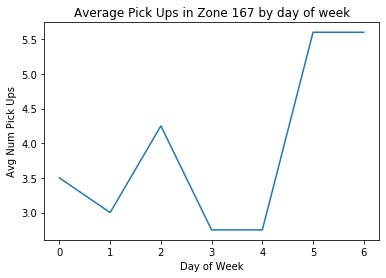

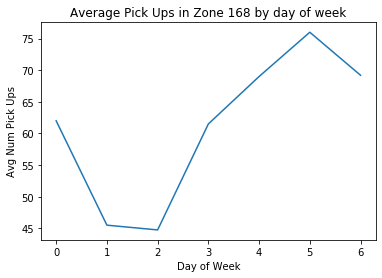

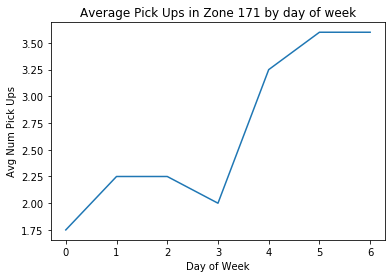

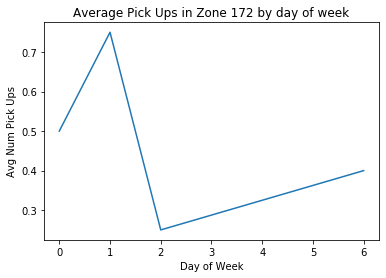

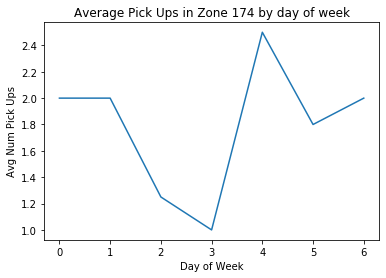

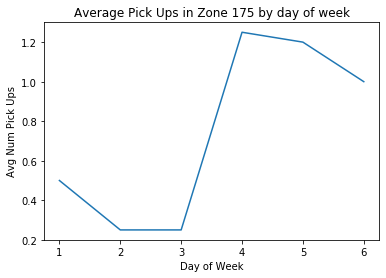

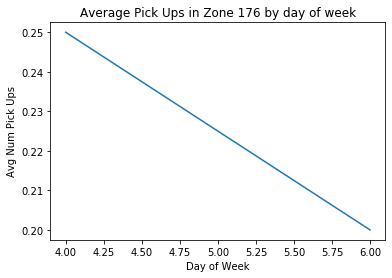

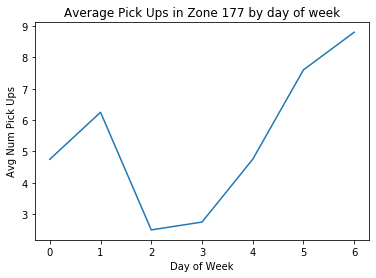

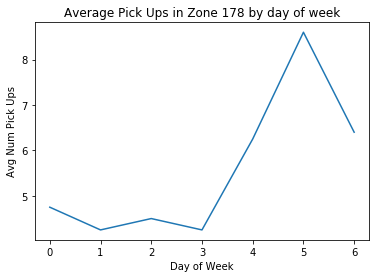

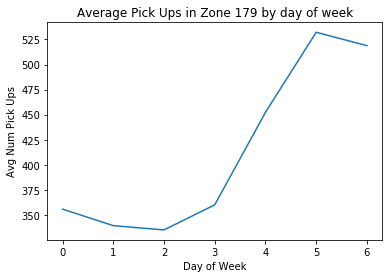

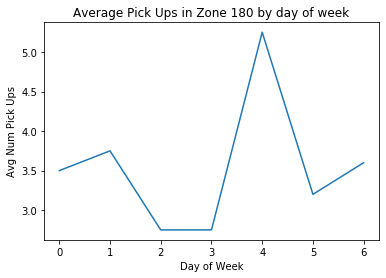

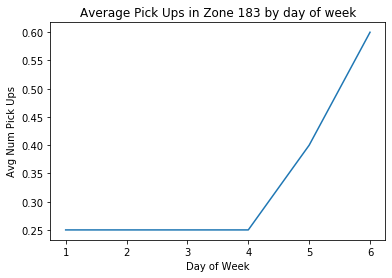

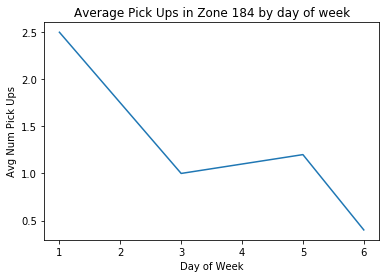

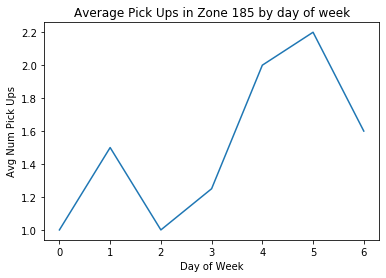

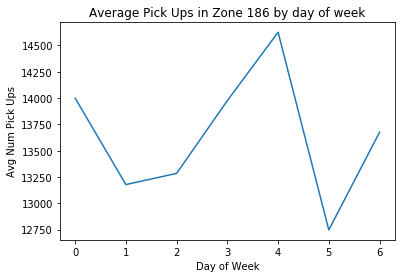

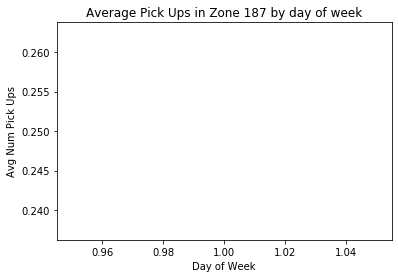

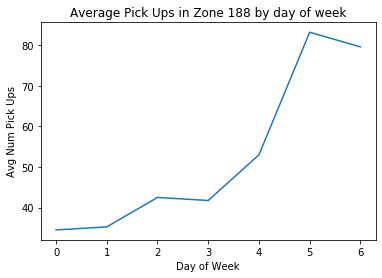

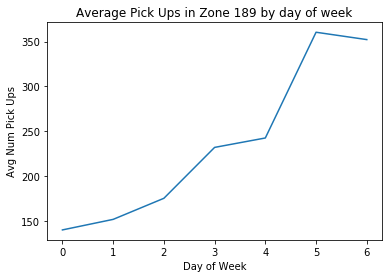

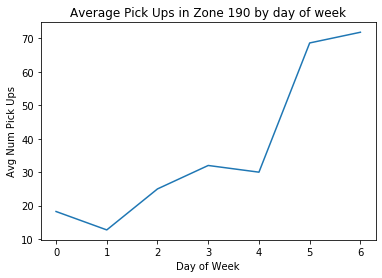

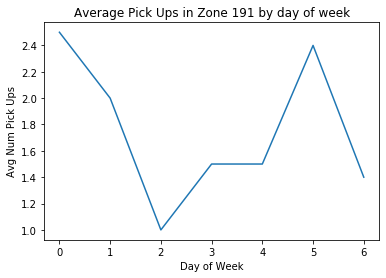

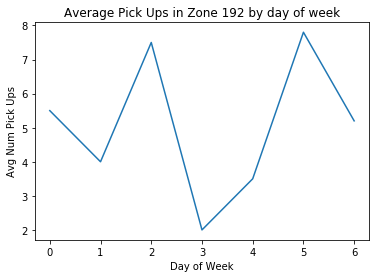

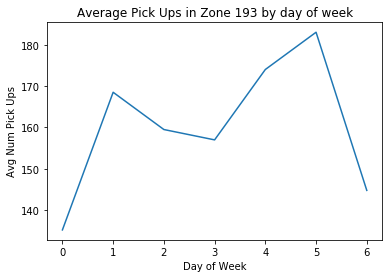

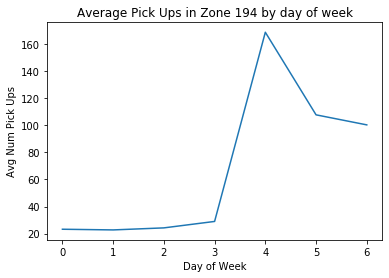

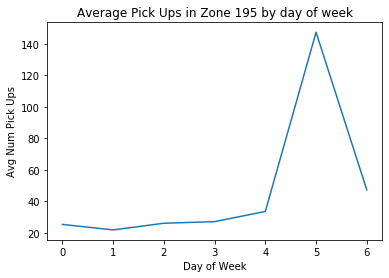

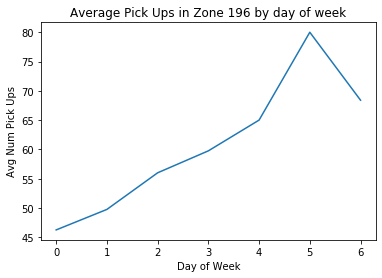

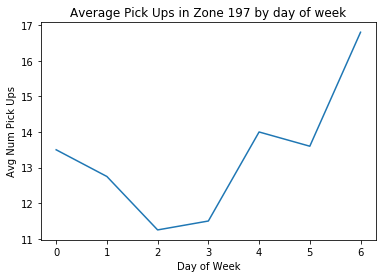

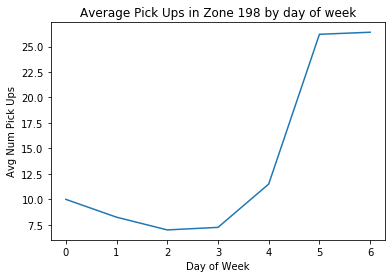

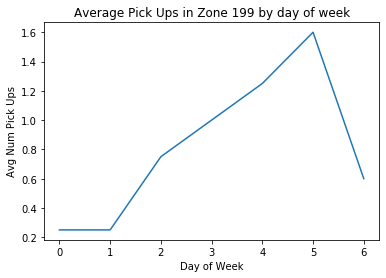

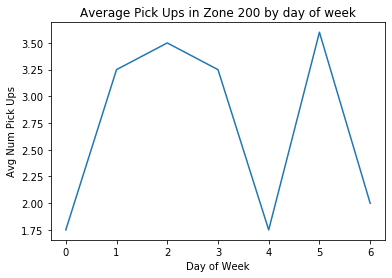

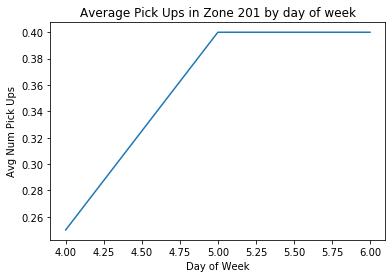

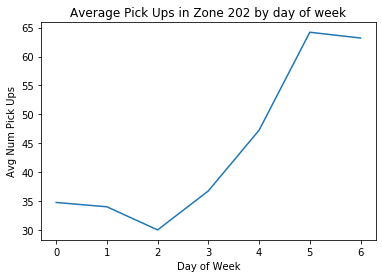

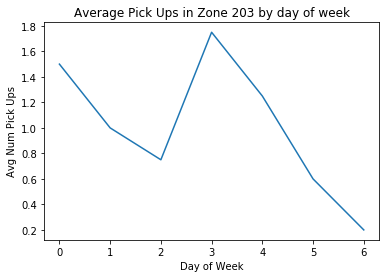

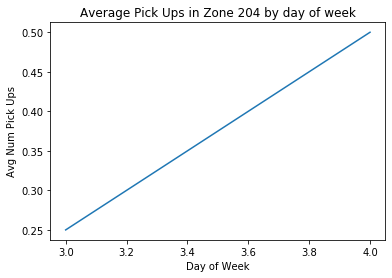

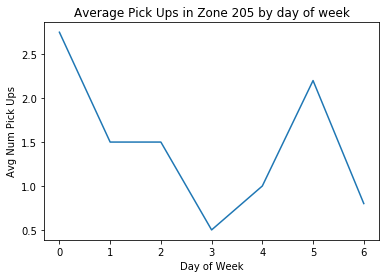

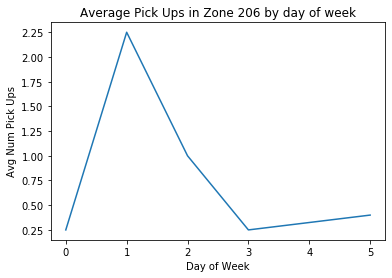

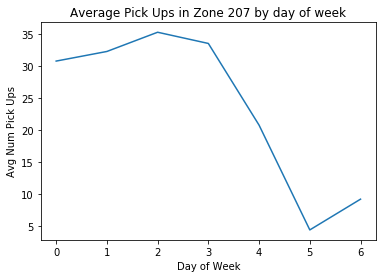

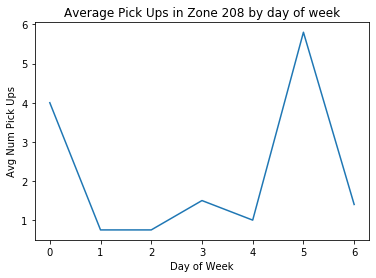

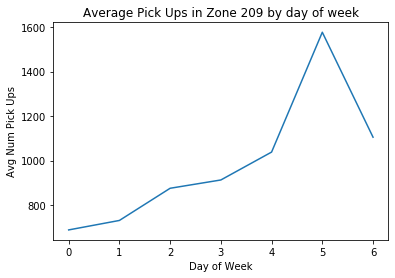

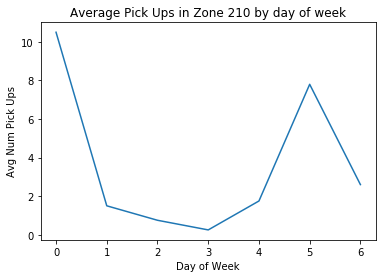

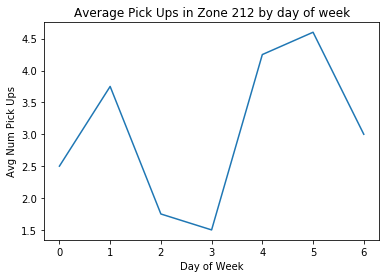

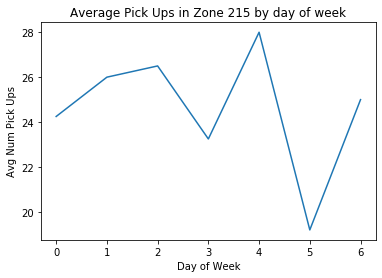

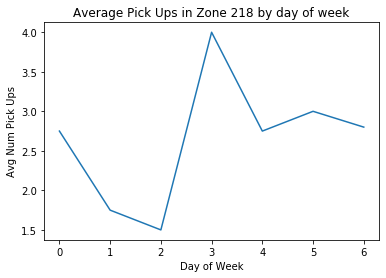

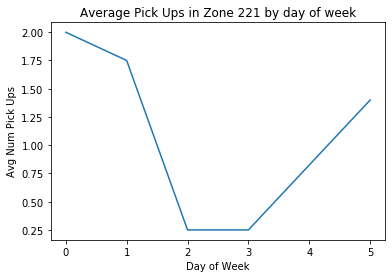

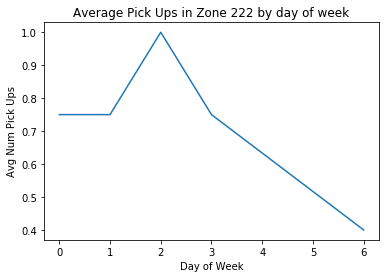

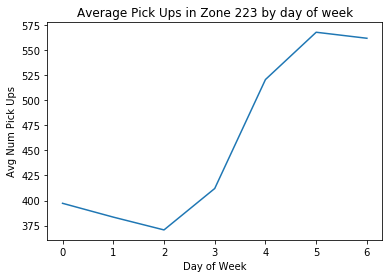

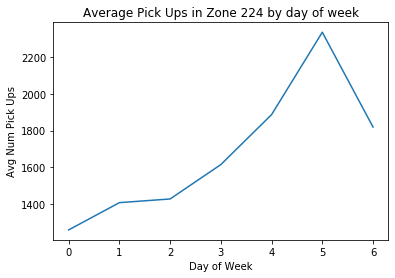

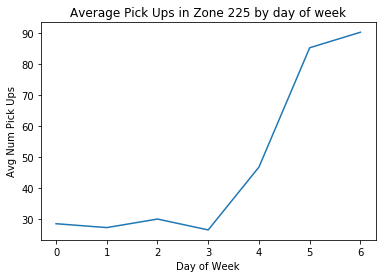

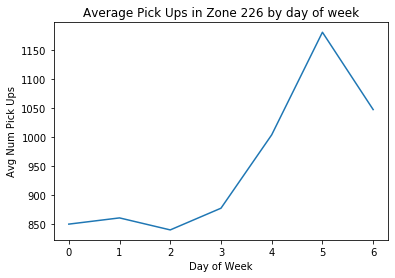

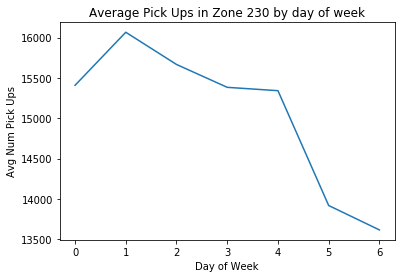

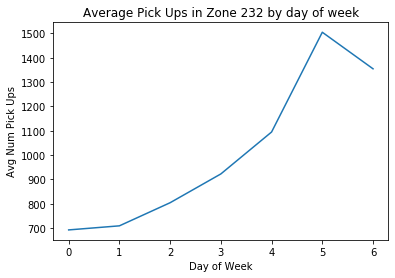

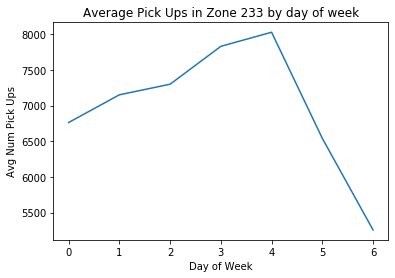

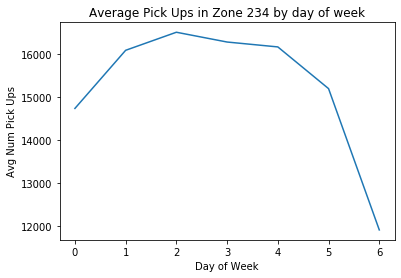

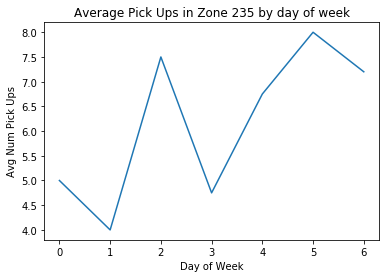

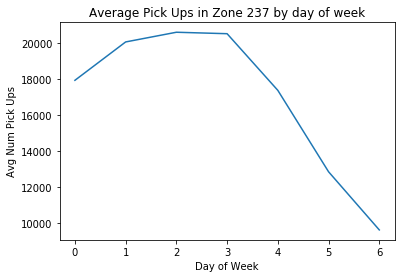

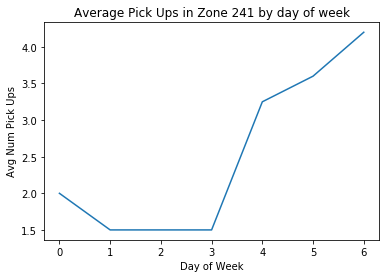

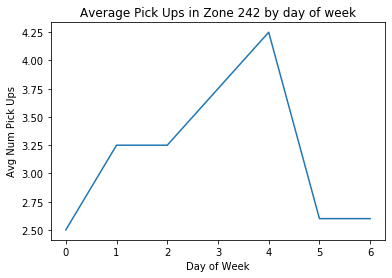

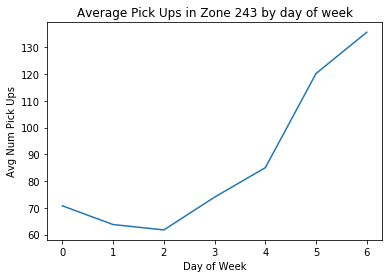

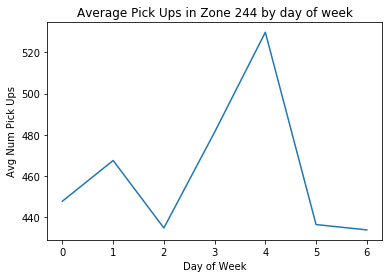

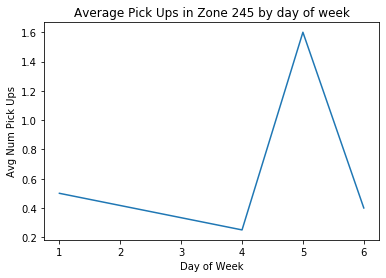

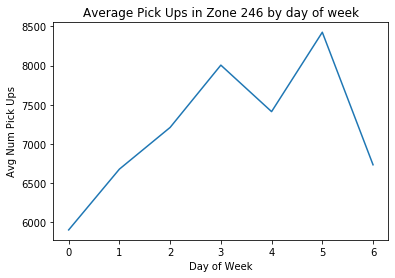

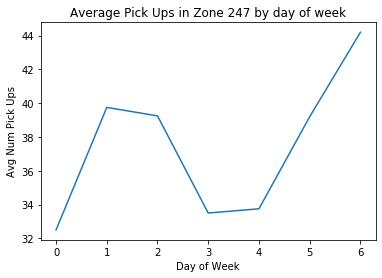

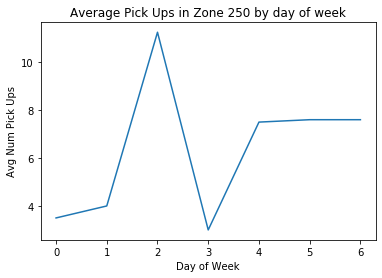

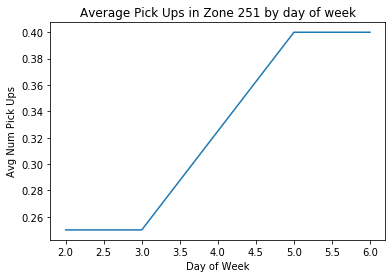

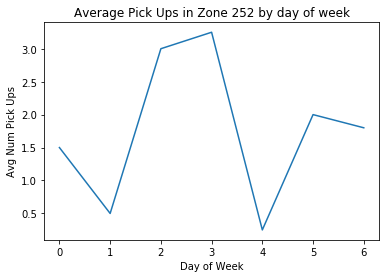

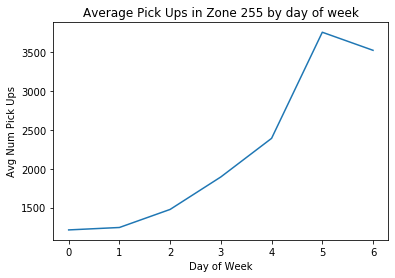

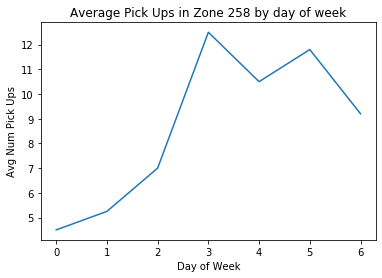

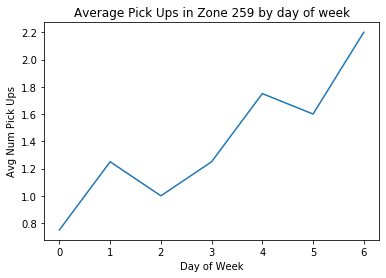

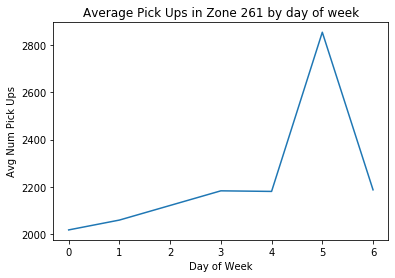

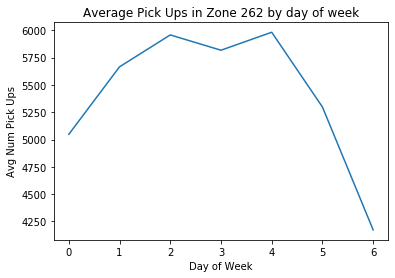

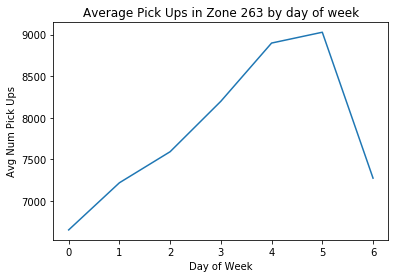

In [212]:
#Plot behavioral data by day of week by taxi zone for all taxi zones
for i in range(1,264,1):
    plot2 = pu_dayofweek2[(pu_dayofweek2.pickup_taxizone_id==i)]
    plt.plot(plot2.day_of_week, plot2.avg_pu_dayofweek)

    # set axis titles
    plt.xlabel("Day of Week")
    plt.ylabel("Avg Num Pick Ups")

    # set chart title
    plt.title("Average Pick Ups in Zone "+str(i)+" by day of week")


    plt.show()

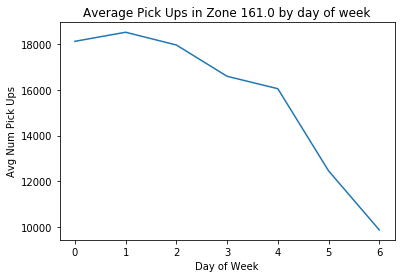

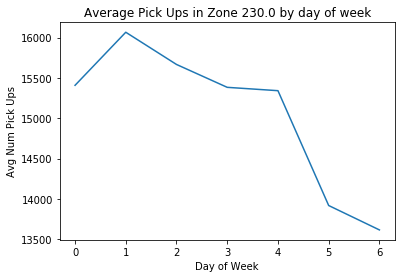

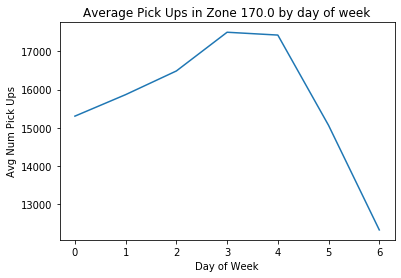

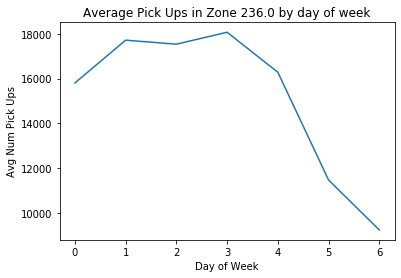

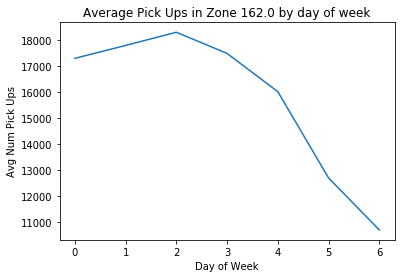

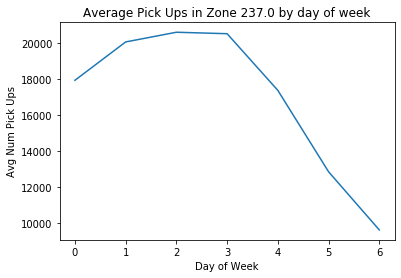

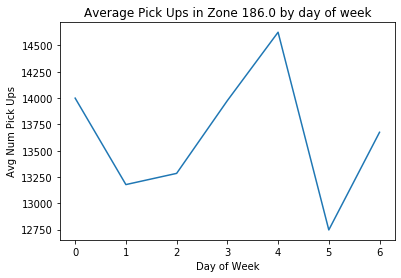

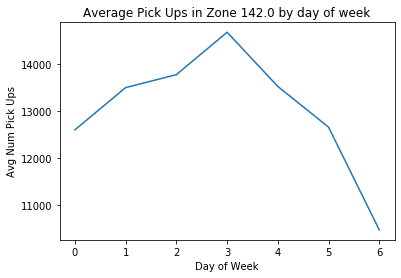

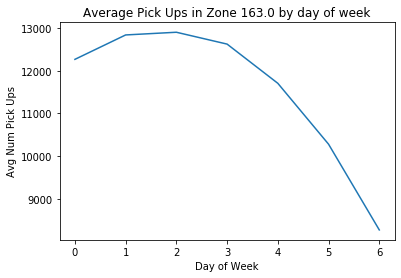

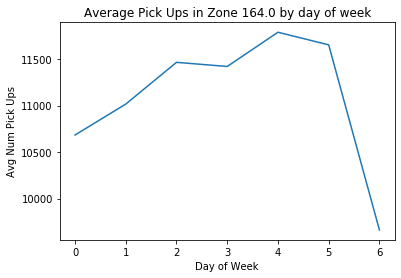

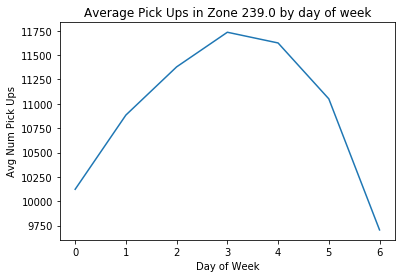

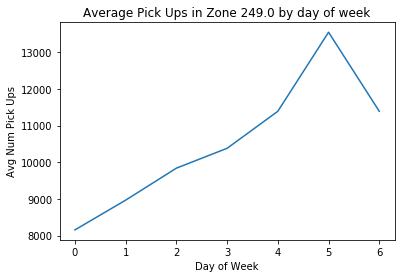

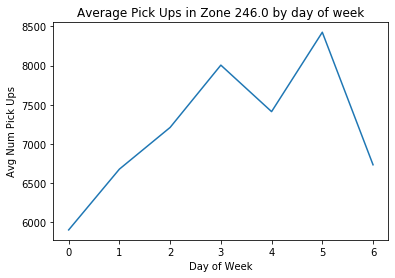

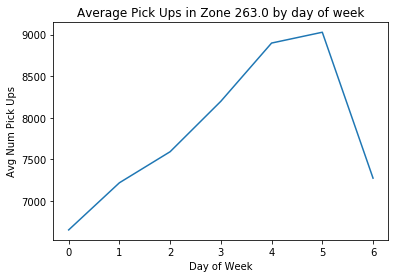

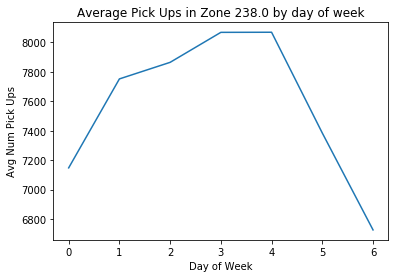

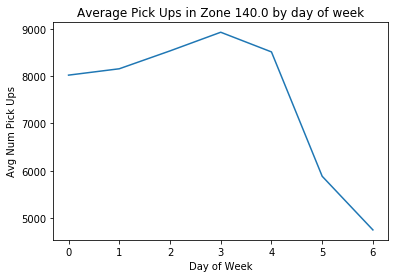

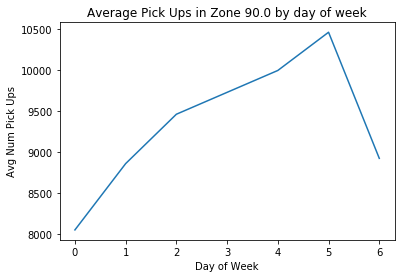

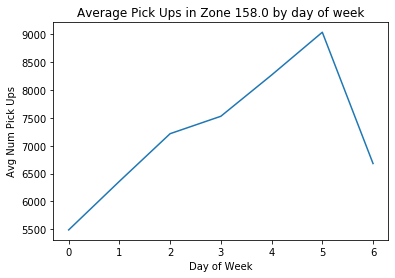

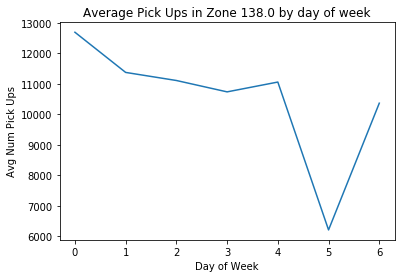

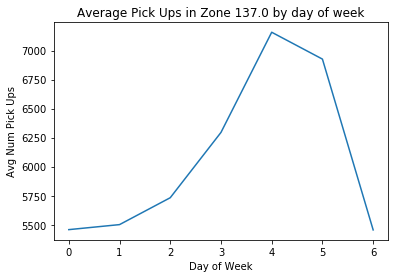

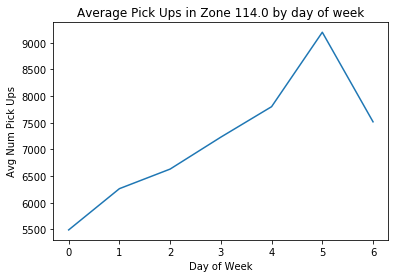

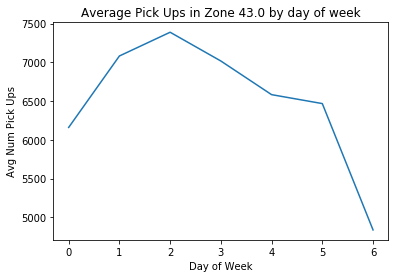

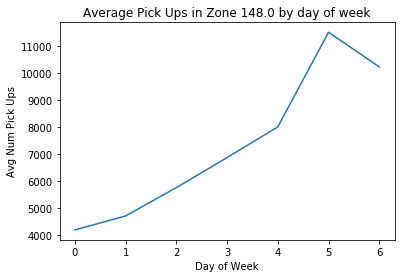

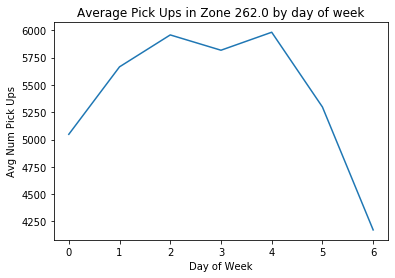

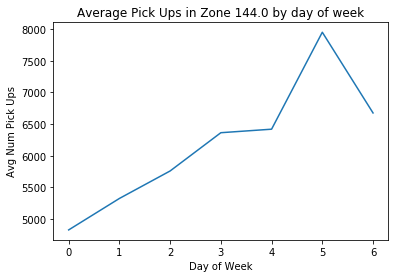

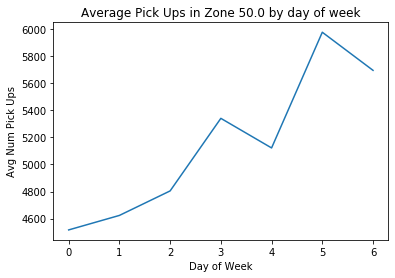

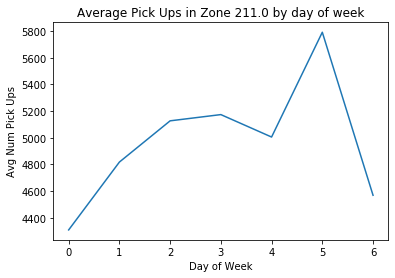

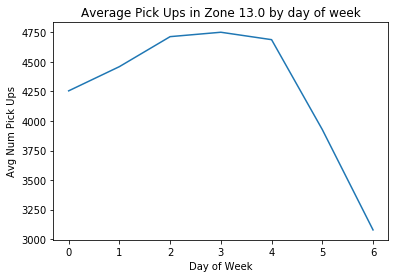

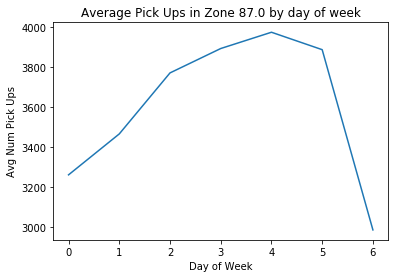

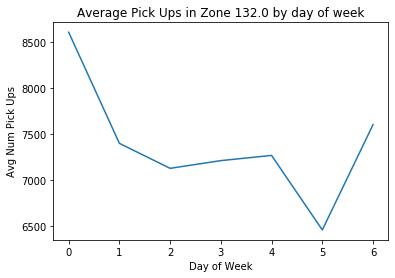

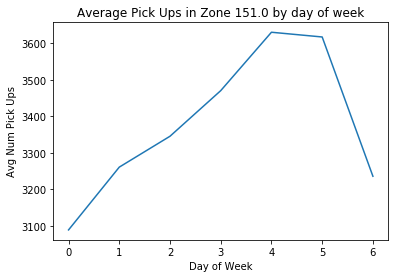

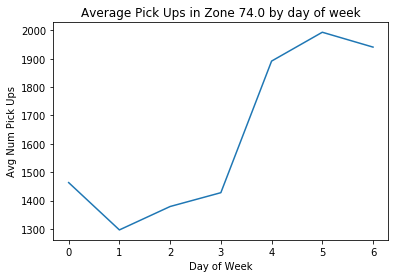

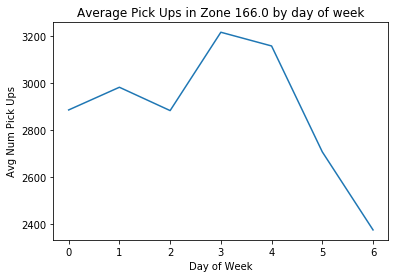

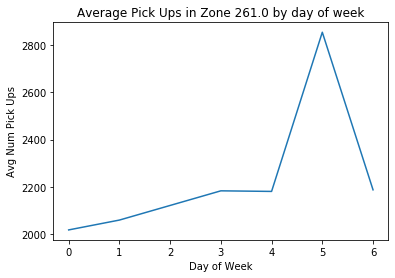

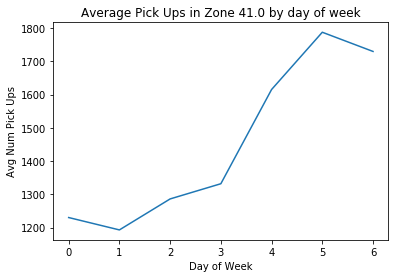

In [228]:
#Plot behavioral data by day of week by taxi zone for top taxi zones in terms of traffic/frequency
topzones = list(df["dropoff_taxizone_id"].value_counts().index)[0:50]

for i in topzones:
    plot2 = pu_dayofweek2[(pu_dayofweek2.pickup_taxizone_id==i)]
    plt.plot(plot2.day_of_week, plot2.avg_pu_dayofweek)

    # set axis titles
    plt.xlabel("Day of Week")
    plt.ylabel("Avg Num Pick Ups")

    # set chart title
    plt.title("Average Pick Ups in Zone "+str(i)+" by day of week")


    plt.show()